<a href="https://colab.research.google.com/github/park-jiha/CNN/blob/main/2.%20MNIST_LeNet5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST_LeNet5_실습

In [39]:
# 필요 라이브러리 import
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # cuda device 설정!!

# 시드 고정
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [41]:
# TorchVision의 MNIST 영상이 28x28로 가공되어 있어, Original 입력 사이즈 32x32로 맞추기 위해..
# 입력사이즈 맞추는거 중요해요!
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# MNIST dataset

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms,
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms,
                         download=True)


In [42]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=256,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=256,
                                          shuffle=True,
                                          drop_last=True)


### LeNet5 모델 생성하기
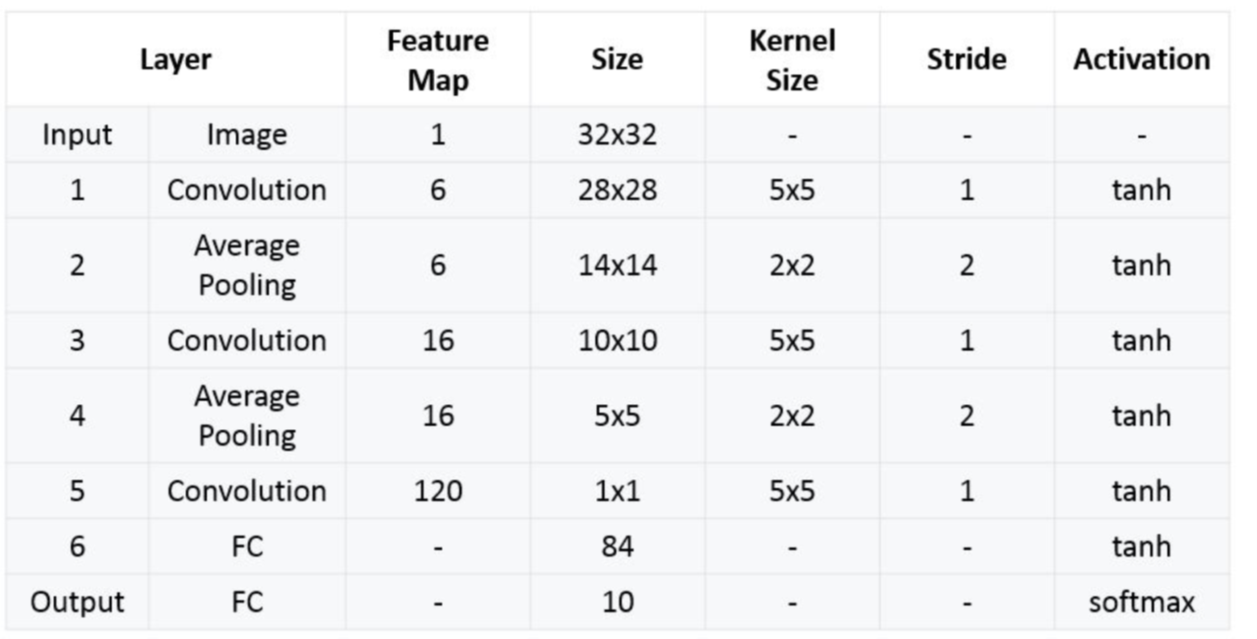

### 모델 생성 직접 해보자

In [43]:
# LeNet5 모델 생성 - 직접 만들어보세요 (정답 코드는 맨 아래에)
# 위 표를 보고 파이토치 document를 참고해서 코딩해보자










In [44]:
model = LeNet5().to(device)

print(model)

LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (x1): Tanh()
  (s2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (x3): Tanh()
  (s4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (f5): Linear(in_features=400, out_features=120, bias=True)
  (x5): Tanh()
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (x6): Tanh()
  (output): Linear(in_features=84, out_features=10, bias=True)
)


In [45]:
# parameters -> 본인이 다양하게 실행해고보 최적의 값 찾아보기
learning_rate = 0.9
training_epochs = 20

In [46]:
# MNIST는 다중분류 -> CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss().to(device)   
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [47]:
#train

total_batch = len(train_loader)

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader:
        X = X.to(device)
        Y = Y.to(device)

        # H(x) 계산
        hypothesis = model(X)
        # cost 계산
        cost = criterion(hypothesis, Y)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>2}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

[Epoch:  1] cost = 0.331034392
[Epoch:  2] cost = 0.0979598463
[Epoch:  3] cost = 0.06193313
[Epoch:  4] cost = 0.0461119637
[Epoch:  5] cost = 0.0362575427
[Epoch:  6] cost = 0.0274914
[Epoch:  7] cost = 0.0222860798
[Epoch:  8] cost = 0.0190499481
[Epoch:  9] cost = 0.0148459394
[Epoch: 10] cost = 0.0112104835
[Epoch: 11] cost = 0.00996043812
[Epoch: 12] cost = 0.00726703089
[Epoch: 13] cost = 0.00603109039
[Epoch: 14] cost = 0.00517221773
[Epoch: 15] cost = 0.00348040578
[Epoch: 16] cost = 0.00319765019
[Epoch: 17] cost = 0.00251279306
[Epoch: 18] cost = 0.00246078731
[Epoch: 19] cost = 0.0014323527
[Epoch: 20] cost = 0.00136190373
Learning Finished!


In [48]:
accuracy = 0
total_batch = len(test_loader)

with torch.no_grad():
  model.eval()

  for X, Y in test_loader:
    Y = Y.to(device)
    X = X.to(device)


    prediction = model(X)
    correct_prediction = torch.argmax(prediction, 1) == Y
    accuracy += correct_prediction.float().mean()

print('Accuracy:', accuracy.item()/total_batch)


Accuracy: 0.9876802884615384


### 정답 코드

In [49]:
# 모델 정답 코드

class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5_,self).__init__() 

    self.c1 = torch.nn.Conv2d(1,6,kernel_size=5,stride=1,padding=0)
    self.x1 = torch.nn.Tanh()
    self.s2 = torch.nn.AvgPool2d(kernel_size=2,stride=2)

    self.c3 = torch.nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0)
    self.x3 = torch.nn.Tanh()
    self.s4 = torch.nn.AvgPool2d(kernel_size=2,stride=2) 

    self.fl = torch.nn.Faltten()

    self.f5 = torch.nn.Linear(16*5*5,120,bias=True)
    self.x5 = torch.nn.Tanh()
    
    self.f6 = torch.nn.Linear(120,84,bias=True)
    self.x6 = torch.nn.Tanh()
    
    self.output = torch.nn.Linear(84,10,bias=True)


  def forward(self,x):
    out = self.c1(x)
    out = self.x1(out)
    out = self.s2(out)
    out = self.c3(out)
    out = self.x3(out)
    out = self.s4(out)        
    out = out.view(out.size(0),-1) # batch x 1 x 1 x 120  
    out = self.f5(out)
    out = self.x5(out)
    out = self.f6(out)    
    out = self.x6(out)
    out = self.output(out)  

    return out